In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("country_wise_latest.csv")
data.fillna(0)
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


# Analyzing the COVID-19 impact: A comparative study of COVID-19 cases and deaths across countries/regions

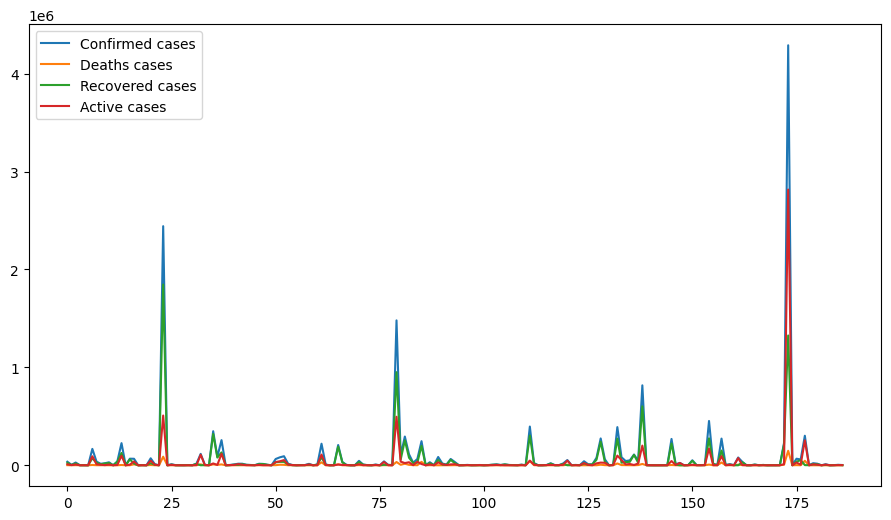

In [27]:
plt.figure(figsize=(11, 6))

plt.plot(data.Confirmed,label="Confirmed cases")
plt.plot(data.Deaths,label="Deaths cases")
plt.plot(data.Recovered,label="Recovered cases")
plt.plot(data.Active,label="Active cases")

plt.legend()
plt.show()

In [17]:
total_cases = np.sum(data['Confirmed'])
total_deaths = np.sum(data['Deaths'])
total_recoveries = np.sum(data['Recovered'])
active_cases = total_cases - total_deaths - total_recoveries
print('Basic data')
print("Total cases:", total_cases)
print("Total deaths:", total_deaths)
print("Total recoveries:", total_recoveries)
print("Active cases:", active_cases)

Basic data
Total cases: 16480485
Total deaths: 654036
Total recoveries: 9468087
Active cases: 6358362


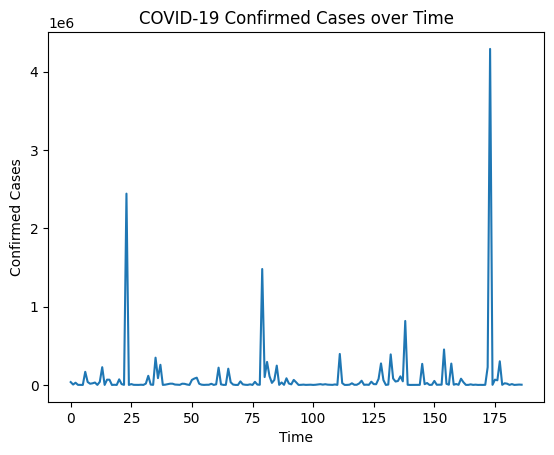

In [25]:
plt.plot(data['Confirmed'])
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Confirmed Cases over Time')
plt.show()

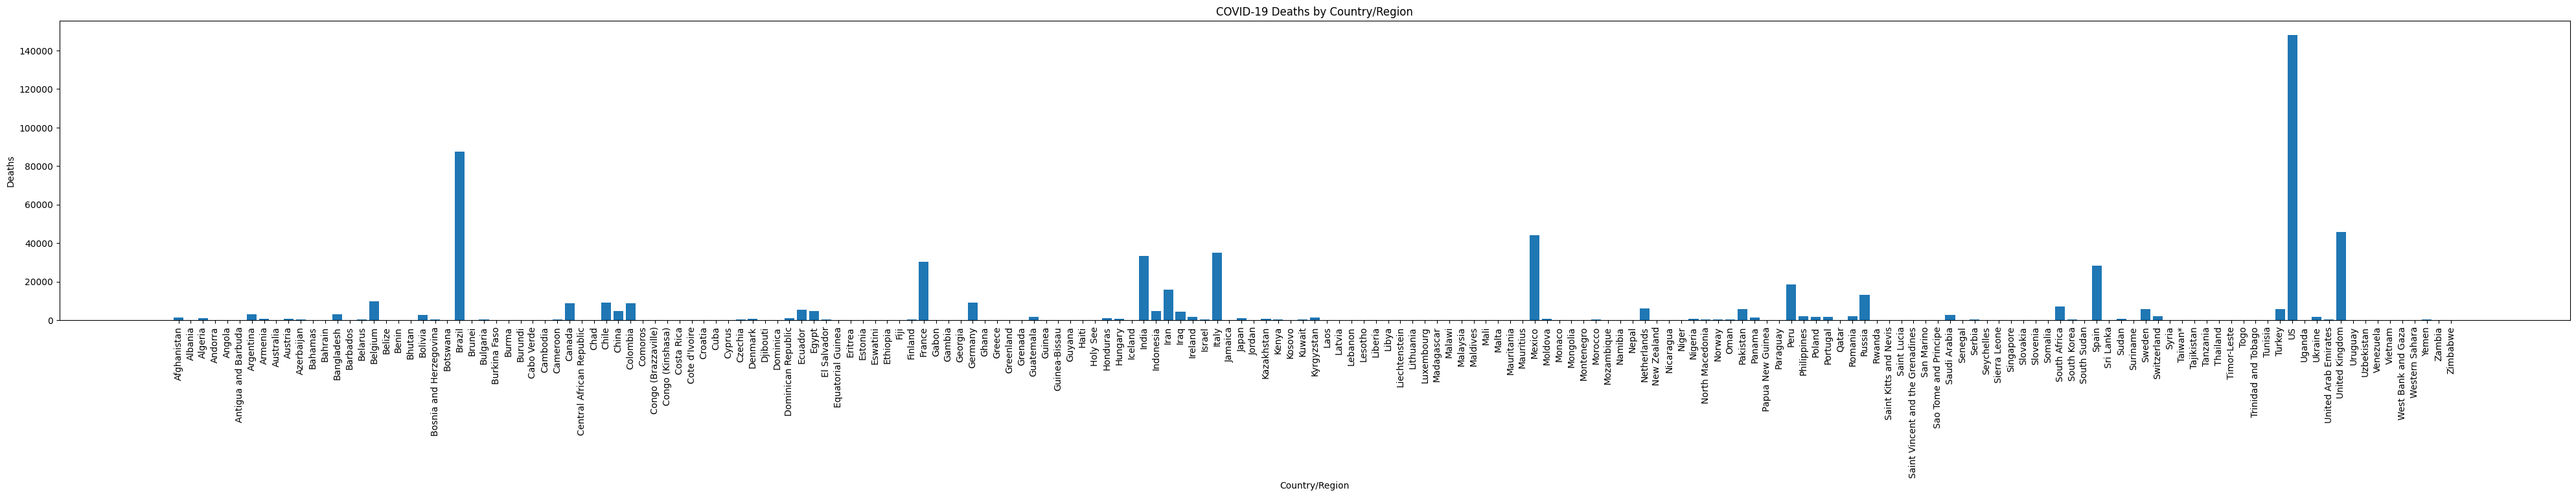

In [26]:
plt.figure(figsize=(50, 6))

plt.bar(data['Country/Region'], data['Deaths'])
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.title('COVID-19 Deaths by Country/Region')
plt.xticks(rotation=90)
plt.show()


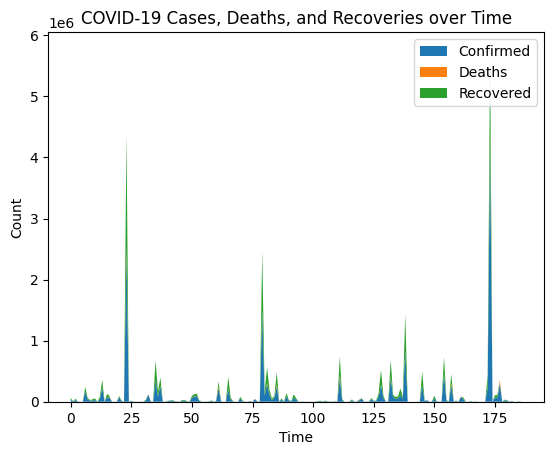

In [27]:
# Stacked area chart: Comparing the distribution of cases, deaths, and recoveries
plt.stackplot(data.index, data['Confirmed'], data['Deaths'], data['Recovered'], labels=['Confirmed', 'Deaths', 'Recovered'])
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('COVID-19 Cases, Deaths, and Recoveries over Time')
plt.legend()
plt.show()

# Distribution of covid patients among top 5 countries

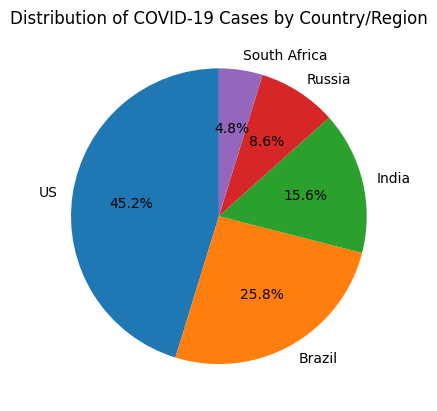

In [28]:
grouped_data = data.groupby('Country/Region')['Confirmed'].sum()

# Gettig the top 5 countries/regions with the highest number of confirmed cases
top_countries = grouped_data.nlargest(5)

# Calculate the percentage of cases for each country
percentages = (top_countries / top_countries.sum()) * 100

# Create a pie chart
plt.pie(percentages, labels=top_countries.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of COVID-19 Cases by Country/Region')

# Display the pie chart
plt.show()


In [24]:
deaths = data['Deaths']
max_deaths = np.max(deaths)
max_deaths_index = np.argmax(data['Deaths'])
country_with_max_deaths = data.loc[max_deaths_index, 'Country/Region']
print(f"The country with the maximum deaths is {country_with_max_deaths} with {max_deaths}")

The country with the maximum deaths is US with 148011


In [25]:
data['Death Rate'] = (data['Deaths'] / data['Confirmed']) 
lowest_death_rate_index = np.argmin(data['Death Rate'])
country_with_lowest_death_rate = data.loc[lowest_death_rate_index, 'Country/Region']
print(f"The country or region with the lowest death rate is {country_with_lowest_death_rate}")

The country or region with the lowest death rate is Bhutan


# Total percentage of deaths,Recoveries and Active cases

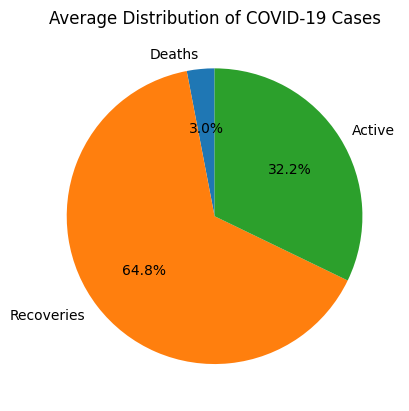

In [26]:
average_death_percentage = (data['Deaths'] / data['Confirmed'] * 100).mean()
average_recovery_percentage = (data['Recovered'] / data['Confirmed'] * 100).mean()
average_recovery_active = (data['Active'] / data['Confirmed'] * 100).mean()
labels = ['Deaths', 'Recoveries', 'Active']
percentages = [average_death_percentage, average_recovery_percentage, average_active_percentage]
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Average Distribution of COVID-19 Cases')
plt.show()